K-Nearest Neighbors (KNN) is a supervised learning algorithm widely used for both classification and regression tasks. It's a non-parametric method, meaning it doesn't make any assumptions about the underlying data distribution. Here's a breakdown of how KNN works:<br><br>

Core Idea:

Distance Metric: KNN relies on a distance metric (e.g., Euclidean distance) to determine how similar data points are. This metric calculates the distance between a new data point and existing data points in the training set.<br><br>
K Neighbors: The algorithm identifies the K closest data points (neighbors) to the new data point based on the chosen distance metric. The value of K is a hyperparameter that needs to be tuned for optimal performance.<br><br>
Prediction (Classification):
For classification problems, the most frequent class label among the K nearest neighbors is assigned as the predicted class for the new data point. In essence, the new data point is classified based on the majority vote of its neighbors.<br><br>
Prediction (Regression):
For regression problems, the average value of the target variable among the K nearest neighbors is used as the predicted value for the new data point.

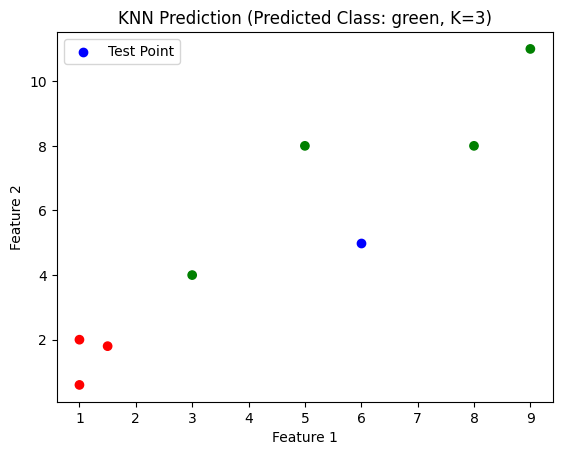

In [4]:
import matplotlib.pyplot as plt
from math import sqrt

# Sample data (replace with your data)
X = [[1, 2], [3, 4], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]
y = ['red', 'green', 'red', 'green', 'green', 'red', 'green']  # Class labels

def euclidean_distance(p1, p2):
  """Calculates the Euclidean distance between two data points (p1 and p2)."""
  squared_distances = [(a - b) ** 2 for a, b in zip(p1, p2)]
  return sqrt(sum(squared_distances))

def predict_class(X_train, y_train, test_point, k):
  """Predicts the class label for a test point using KNN with Euclidean distance."""
  distances = []
  for train_point, train_label in zip(X_train, y_train):
    distance = euclidean_distance(test_point, train_point)
    distances.append((distance, train_label))
  sorted_distances = sorted(distances)[:k]  # Get k nearest neighbors
  neighbor_labels = [label for distance, label in sorted_distances]
  most_frequent_label = max(set(neighbor_labels), key=neighbor_labels.count)
  return most_frequent_label

# Define a test point to predict (replace with your actual test point)
test_point = [6, 5]

# Visualization setup
colors = {'red': 'r', 'green': 'g'}  # Define colors for classes

# Plot data points with colors based on class labels
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[colors[l] for l in y])

# Plot the test point in a different color (e.g., blue)
plt.scatter(test_point[0], test_point[1], color='blue', marker='o', label='Test Point')

# K value (choose an appropriate value for K based on your data)
k = 3

# Predict class label for the test point
predicted_label = predict_class(X, y, test_point, k)

# Plot a circle around the K nearest neighbors (optional)
# ... (implementation details for plotting the circle based on K nearest neighbors)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KNN Prediction (Predicted Class: {predicted_label}, K={k})')
plt.legend()
plt.show()


KNN USING SKLEARN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the Iris flower classification dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (flower type)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors classifier model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

# Calculate additional classification metrics (optional)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
